In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_name = "Dentistry Dataset.csv"  
data = pd.read_csv(file_name)

In [3]:
# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  le

In [4]:
# Descriptive statistics of numerical columns
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
             Sl No  Sample ID          Age  inter canine distance intraoral  \
count  1100.000000        0.0  1100.000000                      1100.000000   
mean    550.500000        NaN    21.625455                        25.989009   
std     317.686953        NaN     2.085892                         1.315292   
min       1.000000        NaN    18.000000                        23.120000   
25%     275.750000        NaN    20.000000                        25.000000   
50%     550.500000        NaN    22.000000                        25.900000   
75%     825.250000        NaN    23.000000                        26.992500   
max    1100.000000        NaN    25.000000                        30.310000   

       intercanine distance casts  right canine width intraoral  \
count                 1100.000000                   1100.000000   
mean                    25.880082                      6.563000   
std                      1.862323                      0.37903

In [5]:
# Gender-based analysis: Count data by gender
gender_counts = data['Gender'].value_counts()
print("\nGender Counts:")
print(gender_counts)


Gender Counts:
Gender
Female    550
Male      550
Name: count, dtype: int64


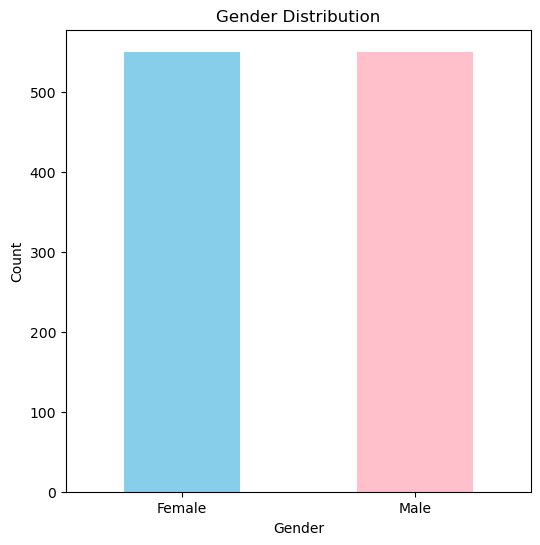

In [6]:
# Plot gender distribution
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'], title="Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

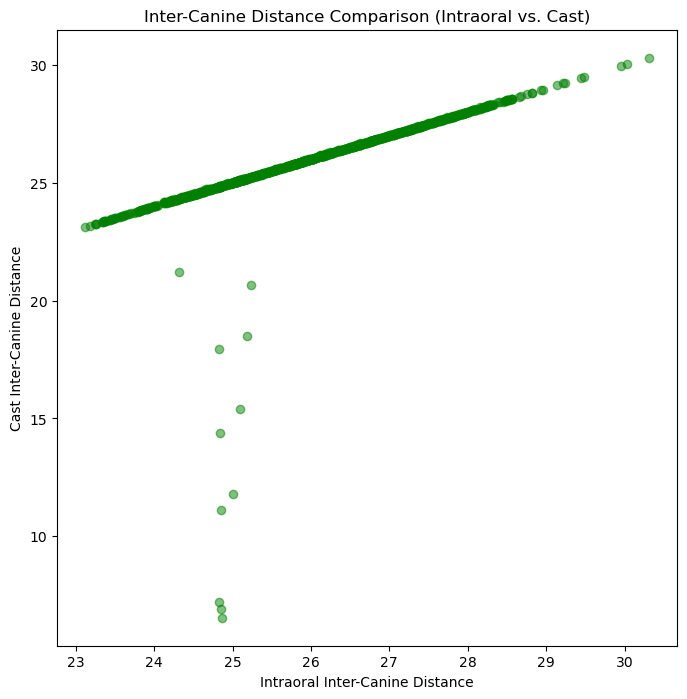

In [7]:
# Scatter plot: Inter-canine distances (intraoral vs. cast)
plt.figure(figsize=(8, 8))
plt.scatter(data['inter canine distance intraoral'], data['intercanine distance casts'], alpha=0.5, c='green')
plt.title("Inter-Canine Distance Comparison (Intraoral vs. Cast)")
plt.xlabel("Intraoral Inter-Canine Distance")
plt.ylabel("Cast Inter-Canine Distance")
plt.show()

In [8]:
# Compute mean inter-canine distance intraoral by gender
mean_distances = data.groupby('Gender')['inter canine distance intraoral'].mean()
print("\nMean Intraoral Inter-Canine Distance by Gender:")
print(mean_distances)


Mean Intraoral Inter-Canine Distance by Gender:
Gender
Female    25.541364
Male      26.436655
Name: inter canine distance intraoral, dtype: float64


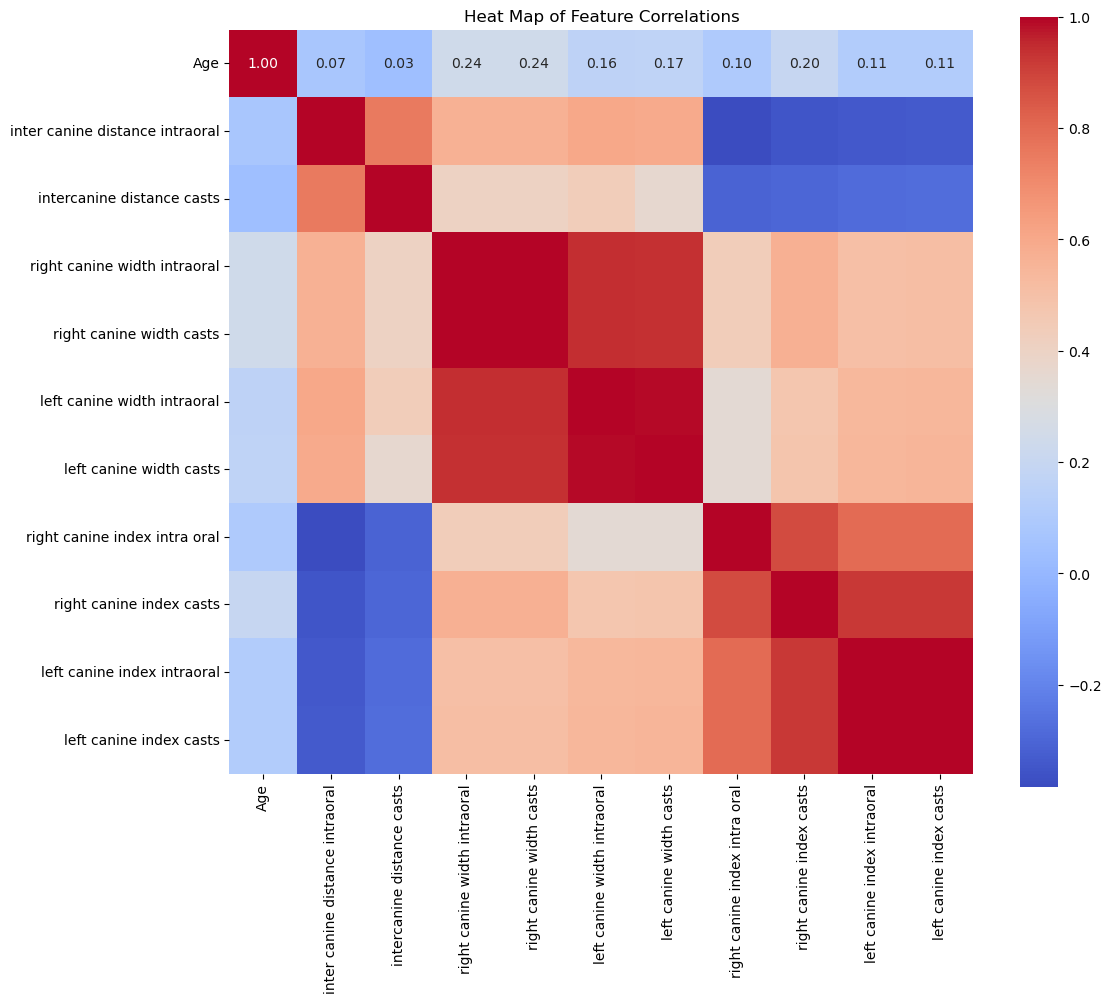

In [9]:

# Drop any non-numerical columns that won't contribute to the correlation matrix
numerical_data = data.drop(['Sl No', 'Sample ID', 'Gender'], axis=1)

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot a heat map of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Heat Map of Feature Correlations")
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


data = data.drop(['Sl No', 'Sample ID'], axis=1)

# Encode categorical variables like Gender
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Female -> 0, Male -> 1


X = data.drop('Gender', axis=1)  
y = data['Gender'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       113
           1       0.87      0.93      0.90       107

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220


Accuracy Score:
0.8954545454545455


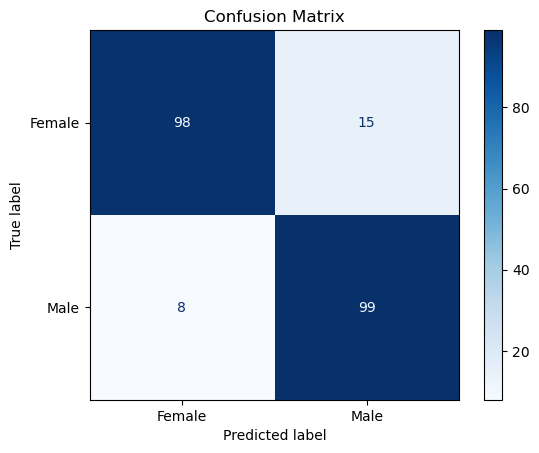

ROC-AUC Score: 0.96


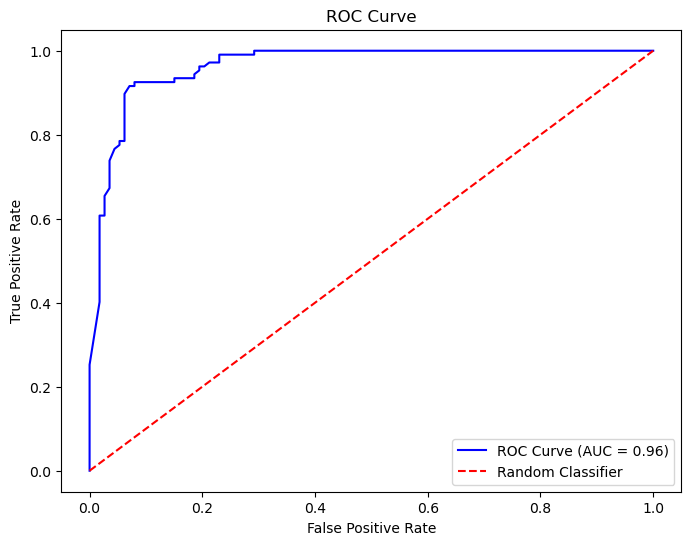

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best Accuracy Score from Grid Search: 0.9045454545454545


In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Evaluate model with Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) 
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Perform Hyperparameter Tuning (Grid Search)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score from Grid Search:", grid_search.best_score_)